Education 1990 predicted using 1990 model:
Mean Squared Error: mean = 5.8478790036277415, median = 5.748435059542762, std = 0.23932302593213636, min = 5.559199499287708, max = 6.216462916375241

Education 2000 predicted using 1990 model:
Mean Squared Error: mean = 8.160949026417848, median = 8.159466226081397, std = 0.17572160864382871, min = 7.849290713797, max = 8.3536196585408

Education 2000 predicted using 2000 model:
Mean Squared Error: mean = 5.95193687037137, median = 5.9095872916833825, std = 0.22266754931300017, min = 5.711054802829156, max = 6.332716032107718
******************************
Unemployment 1990 predicted using 1990 model:
Mean Squared Error: mean = 3.337675544723095, median = 3.3191501485457535, std = 0.1078156421683443, min = 3.1653613775754015, max = 3.4823354001531595

Unemployment 2000 predicted using 1990 model:
Mean Squared Error: mean = 3.812273288279814, median = 3.8169966081275524, std = 0.03577290983523482, min = 3.7568720875083215, max = 3.85633648331

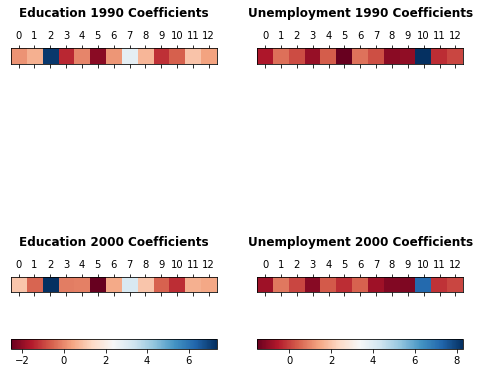

0 = min education
1 = max education
2 = mean education
3 = std education
4 = min population
5 = max population
6 = mean population
7 = std population
8 = min unemployment
9 = max unemployment
10 = mean unemployment
11 = std unemployment
12 = number of neighbors


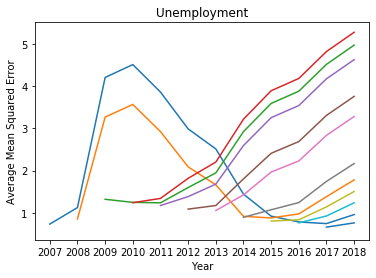

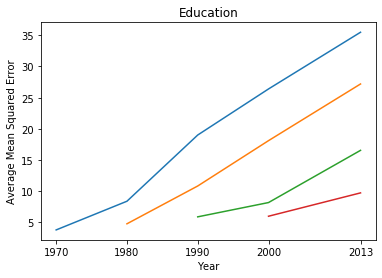

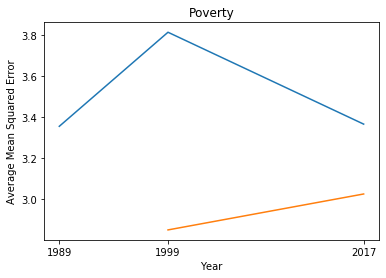

In [2]:
    data_1990 = pickle_in('data/processed_data/clean_regression_1990')
    attribute_idx_to_adj_index_1990 = {j:i for i,j in enumerate(data_1990[:, 0])}
    data_1990 = simplify_education(data_1990)
    data_2000 = pickle_in('data/processed_data/clean_regression_2000')
    attribute_idx_to_adj_index_2000 = {j:i for i,j in enumerate(data_2000[:, 0])}
    data_2000 = simplify_education(data_2000)

    n = data_1990.shape[0]

    adj_list = pickle_in('data/processed_data/adj_list')

    max_neighbors = max([len(vals) for vals in adj_list.values()])

    do_regression(data_1990, data_2000, adj_list, attribute_idx_to_adj_index_1990, attribute_idx_to_adj_index_2000)
    plot_weights(data_1990, data_2000, adj_list, attribute_idx_to_adj_index_1990, attribute_idx_to_adj_index_2000)

    data = []
    years = list(range(2007, 2019))
    years_to_graph = [years[i:] for i in range(len(years))]

    for year in years:
        data.append(pickle_in('data/processed_data/unemployment_'+str(year)))

    do_regression_single_variable(data, adj_list, years_to_graph, 'Unemployment')



    data = []
    years = [1970, 1980, 1990, 2000, 2013]
    years_to_graph = [years[i:] for i in range(len(years))]

    for year in years:
        d = pickle_in('data/processed_data/education_' + str(year))
        d = d[:, 2] + d[:, 3]   #only intersted in predicting at least some college
        d = d.reshape(len(d), 1)
        data.append(d)

    do_regression_single_variable(data, adj_list, years_to_graph, "Education")
    
    
    data = []
    years = [1989, 1999, 2017]
    years_to_graph = [years[i:] for i in range(len(years))]

    for year in years:
        data.append(pickle_in('data/processed_data/poverty_' + str(year)))

    do_regression_single_variable(data, adj_list, years_to_graph, 'Poverty')